In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [68]:
name = input("Whats the nature of your data?")
f = open('execution_data.json')
json_data  = json.load(f)

f.close()
# execution_times = np.array([thread["execution time"] for thread in json_data["Threads"]])

Text(0, 0.5, 'Overall Throughput')

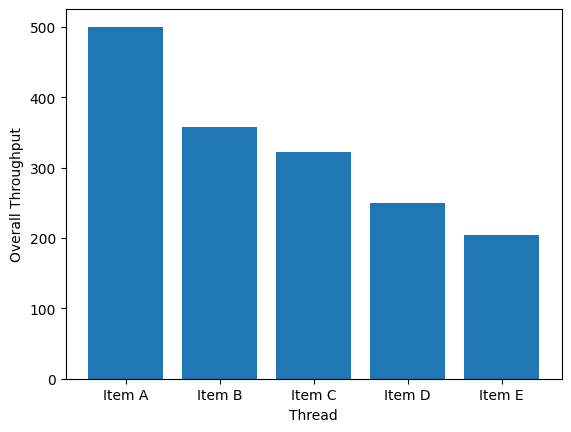

In [69]:
#execution benchmark
process_time = 10;

thread_under_execution = np.array([thread["thread"] for thread in json_data["Threads"]])
unique_threads = np.unique(thread_under_execution)

throughput = np.zeros(len(unique_threads))
i=0
for threads in json_data["Threads"]:
    if "exitedThread" in threads:
        time = threads["time"]
        throughput[i] = process_time*1000/time
        i=i+1
plt.bar(unique_threads, throughput)
plt.xlabel("Thread")
plt.ylabel("Overall Throughput")




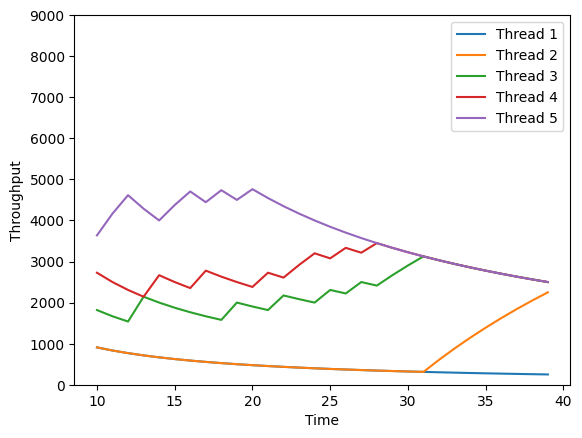

In [70]:
time_array = np.array([thread["time"] for thread in json_data["Threads"]])

num_threads_till_time_t = []
for unique_thread in unique_threads:
  num_threads_till_time_t.append(np.zeros(len(json_data["Threads"])))
for time in range(len(json_data["Threads"])):
  for unique_thread_index in range(len(unique_threads)):
    if json_data["Threads"][time]["thread"] == unique_threads[unique_thread_index]:
      num_threads_till_time_t[unique_thread_index][time] += 1

# Slicing time array for better readability 
# equal : [10:40]
# priority : [5:25]
time_array = time_array[5:25]

#Calculating Throughput
num_array=1;
for array in num_threads_till_time_t:
  count=0;
  for i in range(len(array)):
    if array[i]==1:
      count+=1
      array[i] = (count*process_time*1000)/(i+1)
    if array[i]==0:
      array[i] = (count*process_time*1000)/(i+1)
  array = array[5:40]
  plt.plot(time_array,array, label=f"Thread {num_array}")
  num_array+=1

# Graph attributes
plt.yticks(np.arange(0, 10000, 1000))
plt.xlabel("Time")
plt.ylabel("Throughput")
plt.legend()
plt.show()